### CUNY DATA 605
#### Wk 10 Assignment
#### Tyler Frankenberg

Smith is in jail and has 1 dollar; he can get out on bail if he has 8 dollars. A guard agrees to make a series of bets with him. If Smith bets A dollars, he wins A dollars with probability .4 and loses A dollars with probability .6.  Find the probability that he wins 8 dollars before losing all of his money if:

(a) he bets 1 dollar each time (timid strategy):

*We'll define a function `game_timid` to simulate the game of chance following the timid strategy.  This game is a like a coin flip weighted 3:2 in favor of the guard, so we can model it as a binomial with parameter `p` identifying the probability of success for the prisoner.  We'll use `np.random.binomial()` with parameters `n = 1` and `p = 0.4` to model each flip of this weighted coin, and a `while` loop that breaks when the prisoner's cash on hand is either* $\$0.00$ *, meaning they can no longer play, or $\$8.00$, meaning they can afford bail.*

*We'll then define a class `sims_timid()` which allows us to store a list of outcomes for a number of `game_timid` calls specified by passing a value `num`, plus a parameter `p` which is just the probability passed to each `game_timid`.  This class includes methods to return lists of `win` and `loss` outcomes, as well as a method to return `win_pct`, i.e. the proportion of trials in which the prisoner wins the game and makes bail.*

The following sources were consulted in defining these methods:   
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial  
https://www.youtube.com/watch?v=D2yx2xzjvzc

In [201]:
import numpy as np
from matplotlib import pyplot as plt

In [213]:
def game_timid(prob):
    count, money = 0, 1
    while money:
        rng = np.random.default_rng()
        n, p = 1, prob  # number of trials, probability of each trial
        flip = rng.binomial(n, p)
        if flip == 0:
            money -= 1
        if  flip == 1:
            money += 1
        count += 1
        if money >= 8:
            break
    return count, money

class sims_timid():
    def __init__(self, num, prob):
        self.sims_list = [game_timid(prob) for x in range(num)]

    def win_counts(self):
        sims_list = self.sims_list
        win_counts = []
        for count, money in sims_list:
            if money >= 8:
                win_counts.append(count)
        return win_counts

    def loss_counts(self):
        sims_list = self.sims_list
        loss_counts = []
        for count, money in sims_list:
            if money == 0:
                loss_counts.append(count)
        return loss_counts

    def win_pct(self):
        sims_list = self.sims_list
        wins, losses = 0, 0
        for count, money in sims_list:
            if money == 0:
                losses += 1
            if money == 8:
                wins += 1      
        return wins / (wins + losses) 


*We can now use our `sims_timid()` class to run the simulation a large number of times - in this case, we'll run it 1000 times - and generate a probability of success for the prisoner.  As we can see below, the timid strategy offers the prisoner not much in the way of hope:*

In [216]:
sim_timid = sims_timid(1000, 0.4)
win_count = sim_timid.win_counts()
loss_count = sim_timid.loss_counts()

print("win prob: " + str(np.round(sim_timid.win_pct(), 5)))
print("wins: " + str(len(win_count)))
print("losses: " + str(len(loss_count)))

win prob: 0.016
wins: 16
losses: 984


(b) he bets, each time, as much as possible but not more than necessary to bring his fortune up to 8 dollars (bold strategy):
  
*Here we create a `game_bold` function and a `sims_bold()` class which do the same simulation as above, but emulate the bold strategy in which the prisoner bets as much as they can each time:*

In [215]:
def game_bold(prob):
    count, money = 0, 1
    while money:
        rng = np.random.default_rng()
        n, p = 1, prob  # number of trials, probability of each trial
        flip = rng.binomial(n, p)
        if flip == 0:
            money -= min(money, (8 - money))
        if  flip == 1:
            money += min(money, (8 - money))
        count += 1
        if money >= 8:
            break
    return count, money

class sims_bold():
    def __init__(self, num, prob):
        self.sims_list = [game_bold(prob) for x in range(num)]

    def win_counts(self):
        sims_list = self.sims_list
        win_counts = []
        for count, money in sims_list:
            if money >= 8:
                win_counts.append(count)
        return win_counts

    def loss_counts(self):
        sims_list = self.sims_list
        loss_counts = []
        for count, money in sims_list:
            if money == 0:
                loss_counts.append(count)
        return loss_counts

    def win_pct(self):
        sims_list = self.sims_list
        wins, losses = 0, 0
        for count, money in sims_list:
            if money == 0:
                losses += 1
            if money >= 8:
                wins += 1      
        return wins / (wins + losses) 

...and we can see that the prisoner's probability of a win based on 1000 simulations is somewhat higher than when utilizing the timid strategy:

In [217]:
sim_bold = sims_bold(10000, 0.4)
win_count = sim_bold.win_counts()
loss_count = sim_bold.loss_counts()

print("win prob: " + str(np.round(sim_bold.win_pct(), 5)))
print("wins: " + str(len(win_count)))
print("losses: " + str(len(loss_count)))

win prob: 0.0644
wins: 644
losses: 9356


(c) Which strategy gives Smith the better chance of getting out of jail

*To answer this question, we can reproduce the experiments conducted above a large number of times and consider the distribution of win probabilities.  To do this, we're simply going to repeat our 1000 - game experiment for each strategy 200 times, and store the win probabilities obtained from each experiment in a 'list of lists'.  We can then view the outcome of these experiments side-by-side:*

In [224]:
list_of_lists_timid = [sims_timid(1000, 0.4).win_pct() for x in range(200)]
list_of_lists_bold = [sims_bold(1000, 0.4).win_pct() for x in range(200)]

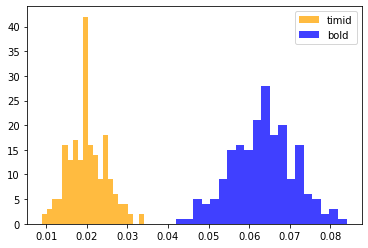

In [ ]:
plt.plot(figsize=(10, 10))

plt.hist(list_of_lists_timid, bins=20, color='orange', alpha = 0.75, label='timid')
plt.hist(list_of_lists_bold, bins=20, color='blue', alpha = 0.75, label='bold')

plt.legend()
plt.show()

*We see that the bold strategy is the clear cut winner for the prisoner, as its entire distribution lays to the right of the entire timid distribution.  That said, it only buys the prisoner a couple of additional percentage points in win probability; he is still over 90% likely to lose his dollar and stay in jail.*